<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Big-Picture-(via-Ramsey's-optimal-accumulation-example):" data-toc-modified-id="The-Big-Picture-(via-Ramsey's-optimal-accumulation-example):-1">The Big Picture (via Ramsey's optimal accumulation example):</a></span></li><li><span><a href="#Exercise-0" data-toc-modified-id="Exercise-0-2">Exercise 0</a></span><ul class="toc-item"><li><span><a href="#Answer-0.1" data-toc-modified-id="Answer-0.1-2.1">Answer 0.1</a></span></li><li><span><a href="#Answer-0.2" data-toc-modified-id="Answer-0.2-2.2">Answer 0.2</a></span></li><li><span><a href="#Throwback-Thursday!" data-toc-modified-id="Throwback-Thursday!-2.3">Throwback Thursday!</a></span></li></ul></li><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-3">Exercise 1</a></span><ul class="toc-item"><li><span><a href="#Answer-1.1" data-toc-modified-id="Answer-1.1-3.1">Answer 1.1</a></span></li><li><span><a href="#Answer-1.2" data-toc-modified-id="Answer-1.2-3.2">Answer 1.2</a></span></li><li><span><a href="#Answers-1.3" data-toc-modified-id="Answers-1.3-3.3">Answers 1.3</a></span></li></ul></li><li><span><a href="#Exercise-2-(Analytical-beefcaking)" data-toc-modified-id="Exercise-2-(Analytical-beefcaking)-4">Exercise 2 (Analytical beefcaking)</a></span><ul class="toc-item"><li><span><a href="#Answer-2" data-toc-modified-id="Answer-2-4.1">Answer 2</a></span></li></ul></li><li><span><a href="#Exercise-3-(Computational-beefcaking)" data-toc-modified-id="Exercise-3-(Computational-beefcaking)-5">Exercise 3 (Computational beefcaking)</a></span><ul class="toc-item"><li><span><a href="#Answer-3" data-toc-modified-id="Answer-3-5.1">Answer 3</a></span></li><li><span><a href="#Extra-stuff-(Appendix-to-Answer-3)" data-toc-modified-id="Extra-stuff-(Appendix-to-Answer-3)-5.2">Extra stuff (Appendix to Answer 3)</a></span></li><li><span><a href="#Exercise-4-(More-beefcaking)" data-toc-modified-id="Exercise-4-(More-beefcaking)-5.3">Exercise 4 (More beefcaking)</a></span></li><li><span><a href="#Exercise-5" data-toc-modified-id="Exercise-5-5.4">Exercise 5</a></span></li><li><span><a href="#Optional-exercise-for-the-serious-student" data-toc-modified-id="Optional-exercise-for-the-serious-student-5.5">Optional exercise for the serious student</a></span></li><li><span><a href="#Answer-5.1" data-toc-modified-id="Answer-5.1-5.6">Answer 5.1</a></span></li></ul></li></ul></div>

Author: [MachinaFantasma](https://github.com/phantomachine) | [Twitter](https://twitter.com/machinafantasma)


**Key Learning Points**

Ideas:

* From theory (pencil and paper) to code implementation

* Backward induction for finite $T$

* Banach's fixed point theorem for infinite $T$

    * Bellman functionals and value functions as fixed points
    
    * From theorem to Successive Approximation algorithm design

Skills/Python:

* 1D Function Approximation and Interpolation
* 1D optimization

Economics:

* Optimal control policy
* Valuation of an optimal program

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.interpolate as interpolate
import matplotlib.mlab as mlab   # For plotting given distribution functions
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import cm
from IPython.display import Image

# The Big Picture (via Ramsey's optimal accumulation example):

**What you already know**. In lectures so far we began with lessons from the classical microeconomics of consumer and general equilibrium theory. We recalled the following example of convex preference and production sets (with smooth preference and production functions), and its insights: 

* A (set of) necessary (and sufficient) condition(s) for equilibrium is that the consumer's preference-driven *marginal rate of substitution* (MRS) between any arbitrary two goods (say good $x$ and good $y$) would be equalized with the *marginal rate of tranformation* (MRT) of the two goods.

* The resulting equilibrium allocation of the goods is supported by a price system (relative prices) that equates with the consumer's MRS and also with the firm's MRT.

**Making the connection to macro**. We then began with a homogenous-good production economy, where there is a finite-horizon dynamic consumption planning problem, as a concrete example. Recalling the Fundamental Welfare Theorems (FWT) of general equilibrium, we could write the market equilibrium problem as a first-best social planning problem (where a price system is not explicitly required to coordinate allocations). This was the problem of choosing a sequence $\mathbf{a} \equiv ( (c_{0}, k_{1}), (c_{1}, k_{2}), ..., (c_{T}, k_{T+1}))$ such that we attain a maximal value:
$$
    V_{T}(k_{0}) = \max_{\mathbf{a}} \left\{ \sum_{t=0}^{T} \beta^{t} U(c_{t}) : k_{t+1} = f(k_{t}) - c_{t}, k_{0} = a \right\},
$$
where $a \in (0,\infty)$ is given, and, $k_{t}$ is a stock of capital fixed at the start of date $t$. The functions $U$ and $f$ are strictly increasing, strictly concave, twice-continuously differentiable and satisfy the usual Inada conditions (so that optimum solutions are guaranteed to be always in the interior of the commodity space, and, unique). 

We ended up with the necessary (and sufficient) conditions for an optimum (equivalently via FWT, for a competitive equilibrium) that says exactly the same thing you've learned from microeconomics (just relabel $x$ and $y$ to date-$t$ and date-$(t+1)$ contingent goods!):
$$
    \frac{\beta U_{c}[g_{t+1}(k_{t+1})]}{U_{c}[g_{t}(k_{t})]} = \frac{1}{f_{k}(k_{t+1})};
$$
and, of course, not forgetting that an optimum (or here, equivalently an equilibrium) solution must be feasible:
$$
    k_{t+1} = f(k_{t}) - g_{t}(k_{t}),
$$
for every date $t \in \{0, ...,T\}$.

where the $(T+1)$ number of functions, $(t, k_{t}) \mapsto g_{t}(k_{t})$ for every $t \in \{0, ...,T\}$ are the sequence of *optimal/equilibrium consumption functions* to be solved for. That is, they give us a value of (optimal/equilibrium) consumption $c_{t}$ as a function of the date $t$ and the state (stock of capital) of the economy $k_{t}$, at the start of date $t$.

**Economics Takeaway**: In the neoclassical models, because the FWTs hold, it is easier to solve an *planner*'s *optimal allocation* (dynamic programming) problem first and then work out the corresponding *competitive equilibrium* pricing functions as a function of the equivalent planner's allocation.

Even when the FWTs fails (e.g., in models with missing (incomplete) markets, monopolistic distortions, or constractual and informational frictions), quite often the problem of directly solving for a (suboptimal) *competitive equilibrium* can still be recursified as a modified dynamic programming problem subject to additional complications/constraints.




# Exercise 0

Let $U(c) = \ln(c)$ and $f(k) = k^{\alpha}$, where $\alpha \in (0,1)$. Set $\beta = 1$.

1. Let $T = 2$. Solve for the sequence of value and consumption (demand) *functions* $\left\{ (t, k_{t}) \mapsto g_{t}(k_{t}): t = 0, ...,T \right\}$.

2. Design a pseudocode that reflects what you just did by hand in the last question. (Hint: Can you decipher the source code/methods below and summarize that as an accurate yet human-readable list of instructions?)

2. Implement/write a Python program to solve this example for any value of $T$. Set $\alpha = 0.333$. (The source methods are given to you below.)

In [2]:
# Model primitives

def u(c, θ):
    """Utility function: CRRA class
    
    Note: Theoretically, u'(c) -> \infty when 
    c -> 0 ("in the limit"). Practically, we may 
    have instances where c=0 ("at the limit").
    A small number, say, 1e-18 is added to prevent
    a "division-by-zero" error.
    """
    if θ == 1.0:
        youtiao = np.log(c)
    elif θ > 0.0 and θ != 1.0:
        youtiao = ((c)**(1.0-θ) - 1.0)/(1.0-θ)
    return youtiao

def f(k, α):
    """Cobb-Douglas production function (per capita)"""
    sifan = k**α
    return sifan

def f_prime(k, α):
    """Cobb-Douglas production function (per capita)"""
    return α*k**(α-1.0)

def C_TotalResources(k, knext, α):
    """Resource constraint - returns c, consumption"""
    xiangjiao = f(k, α) - knext
    return xiangjiao

In [3]:
def FunctionFit(X, Y, kind='linear'):
    """Given discrete data (x,y) \in X x Y,
    Find a continuous approximant function f that
    rationalizes finite data. 
    
    Two flavors:
    linear : linear bases
    cubic  : cubic spline
    """
    if kind == 'linear':
        f = interpolate.interp1d(X,Y)
    elif kind == 'cubic':
        f = interpolate.interp1d(X,Y,kind='cubic')
    return f

In [4]:
def Bellman(V_next_fitted, X, α, β, θ):
    """RHS of Bellman equation is a max. problem
    Assumes input V_next_fitted is interpolant object
    - either analytic or SciPy interpolated using
      continuous basis functions
    """
    # Pre-allocate array space
    g = np.empty(X.size)
    h = g.copy()
    V = g.copy()
    
    # Define Objective Function at fixed k
    fungsiobjektif = lambda k_next, k: -u(f(k, α) - k_next, θ) \
                                        - β*V_next_fitted(k_next) 
            
    # Loop over current states in X
    for idx_k, k in enumerate(X):     
        # Solve max. problem to get g(t)(k), V(t)(k)
        k_lb = X.min()
        k_ub = f(k, α)
        knext_opt, val, ierr, numfeval = opt.fminbound(fungsiobjektif, 
                                       k_lb, k_ub, 
                                       args=(k,),
                                       full_output=True,
                                      )
        g[idx_k] = knext_opt
        # Value at optimum, given k
        V[idx_k] = -val
        # Back out c = h(k), store it
        c_opt = C_TotalResources(k, knext_opt, α)
        h[idx_k] = c_opt
        
    # Fitted (interpolants) policy functions
    g_fitted = FunctionFit(X, g, kind='cubic')
    h_fitted = FunctionFit(X, h, kind='cubic')
    V_fitted = FunctionFit(X, V, kind='cubic')
    
    # Bento box
    result = { 'saving': g_fitted,
               'consumption': h_fitted,
               'value': V_fitted,
               'saving-raw': g,
               'consumption-raw': h,
               'value-raw': V,
    }
    return result

In [5]:
def BackwardInduction_Bellman(X, α, β, θ, T=2):
    # Stage T+1 (scrap) value function
    V_next = np.zeros(X.size)
    V_next_fit = FunctionFit(X, V_next)
    V_list = [ V_next_fit ]

    # List containing sequence of policy functions
    g_list = [ ]
    h_list = [ ]

    # Backward induction loop
    for t in range(T, -1, -1):
        # Get optimizers satisfying stage-t Euler functional
        print("Solving Stage t = %i problem" %(t))
        result = Bellman(V_next_fit, X, α, β, θ)
        # Concatenate stage t policies to list of policy functions
        g_list.append(result['saving'])
        h_list.append(result['consumption'])
        V = result['value']
        V_list.append(V)
        # Use current V_t as t-1 stage input
        V_next_fit = V

    # Re-order g_list, h_list by natural time order
    g_list = g_list[::-1] # k(t+1) = g(t)(k(t))
    h_list = h_list[::-1] #   c(t) = h(t)(k(t))
    V_list = V_list[::-1]
    return g_list, h_list, V_list

In [6]:
# Planning horizon
T = 2

# Model parameters
θ = 1.0
α = 0.3333
β = 0.98
A = 1.0

# Discretized state space
N_states = 100
k_min = 1e-12
k_max = (1.0/A)**(1.0/(α-1.0))
X = np.linspace(k_min, k_max, N_states)

## Answer 0.1

Hint: Set $k_{2} = 0$ (Verify why). Use backward induction just like the example from TS04. The solution is given a by sequence of stage-dependent functions. The outcome (pointwise solution) is characterized by two (second order difference equation in the variable $k$), with the boundary conditions given by the terminal and the initial value of $k$.

## Answer 0.2

Consider the relevant primitive functions for this problem: per-period utility, production or resource constraint functions, state space, action space, discounting.

In the above set of codes/methods, we re-purposed code we wrote last week for solving the exact same problem. (Recall, we solved the FOCs directly for the sequence of date-dependent decision functions.) Now, we solve this by backward induction on the Bellman equation directly. 

In [7]:
g_list, h_list, V_list = BackwardInduction_Bellman(X, α, β, θ, T=2)

Solving Stage t = 2 problem
Solving Stage t = 1 problem
Solving Stage t = 0 problem


## Throwback Thursday!

Recall the exercise we did and solved by hand? See also last tutorial notebook.

In [8]:
# Handcrafted solutions (note T = 2 only)

g_0 = (α*β*(1+α*β))*(X**α) / (1+α*β*(1+α*β))
g_1 = α*β*(X**α) / (1+α*β)
g_2 = np.zeros(g_1.size)
g_list_exact = [ g_0, g_1, g_2 ]

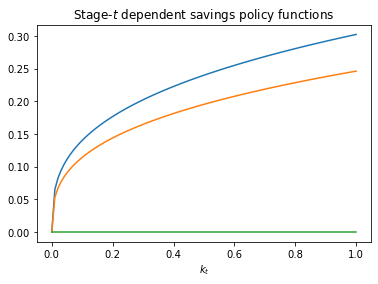

In [9]:
plt.figure()
for t in range(len(g_list_exact)):  
    # Analytical solution
    if θ == 1.0:
        plt.plot(X, g_list_exact[t])
    else:
        print("D'oh! Move along, nothing here to see...")
    plt.xlabel("$k_{t}$")
plt.title("Stage-$t$ dependent savings policy functions")
plt.show() 

Now we will solve the *backward induction* problem directly using the Bellman equation.

We'll compare our numerical results with this plot of the exact decision functions later.

Now we superimpose our backward induction on the Bellman equation solution, onto the analytical solution.

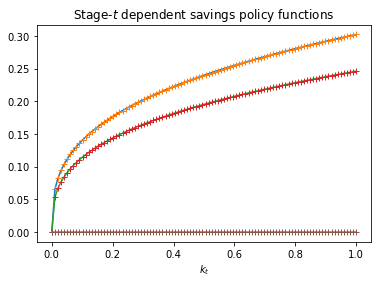

In [10]:
plt.figure()
for t in range(len(g_list)):  
    # Analytical solution
    if θ == 1.0:
        plt.plot(X, g_list_exact[t])
    else:
        print("D'oh! Move along, nothing here to see...")
    # Approximate solution
    plt.plot(X, g_list[t](X), '+',
             label="g("+str(t)+") at $t=$"+str(t)
            )
    plt.xlabel("$k_{t}$")
plt.title("Stage-$t$ dependent savings policy functions")
plt.show() 

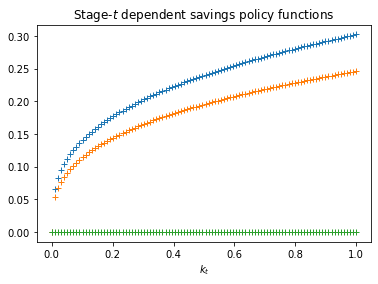

In [11]:
plt.figure()
for t in range(len(g_list)):  
    plt.plot(X, g_list[t](X), '+',
             label="g("+str(t)+") at $t=$"+str(t)
            )
    plt.xlabel("$k_{t}$")
plt.title("Stage-$t$ dependent savings policy functions")
plt.show() 

# Exercise 1

Consider the same economy above, but now $T \rightarrow +\infty$, so that now, $\mathbf{c} \equiv (c_{0}, c_{1}, ...)$. We need to also discount each date-$t$ utility by the factor $\beta^{t}$, where $\beta \in (0,1)$. 

1. Write down the infinite-horizon mathematical programming problem (i.e., the infinite-consumption-sequence planning problem), *precisely*. (For instance, write down a Lagrangean problem but be precise in your notation.)

2. Now re-write the problem as a recursive two-period problem (i.e., the Bellman equation).

3. Prove that there exists a unique solution to the Bellman equation. (*Hint*: The space of continuous functions on a bounded domain is *compact*. Show how you can apply Banach's fixed point theorem.)

## Answer 1.1

Let $V(k_{0}) \equiv V_{0}(k_{0}| \{ g_{t}(k_{t}) \}_{t=0}^{\infty})$ be the *optimal* value to the planner beginning with resources $k_{0}$, who follows some (yet-to-be-determined) optimal consumption policy rule(s) $g_{t}(\cdot)$. By definition then, we have
$$
    V(k_{0}) = \lim_{T \rightarrow \infty}\max \left\{ \sum_{t=0}^{T} 
                                \beta^{t} U[g_{t}(k_{t})] : 
                                %\\
                                 k_{t+1} = f(k_{t}) - g_{t}(k_{t}), 
                                %\\
                                 k_{0} = a, 
                                %\\
                                 0 \leq g_{t}(k_{t}) \leq f(k_{t}),
                                 %\\
                                 k_{T+1} \geq 0
                                \right\}.
$$
Think: Why do we know that the solution functions are dependent on the current state $k_{t}$ for finite $T$?

Claim: It turns out that as $T \rightarrow \infty$ $V_{t} \rightarrow V$ and $g_{t} \rightarrow g$ (i.e., the optimal stage-dependent functions converge to fixed functions *under some regularity conditions*). 


Let $\boldsymbol{\mu} \equiv (\mu_{0}, \mu_{1}, ...)$ and $\boldsymbol{\lambda} \equiv (\lambda_{0}, \lambda_{1}, ...)$ denote sequences of Lagrange multipliers, respectively, on the infinite sequences of the resource accounting constraints and technological (feasibility) constraints. We can, alternatively, define the Lagrange function $\mathcal{L}$ via:
$$
    \mathcal{L}(\mathbf{c}, \boldsymbol{\mu}| k_{0} = a) =  
    \sum_{t=0}^{\infty} \left\{ \beta^{t} U[g_{t}(k_{t})] +  \mu_{t} \left[ f(k_{t}) - g_{t}(k_{t}) - k_{t+1}\right] 
    +\lambda_{t} \left[ f(k_{t}) - g_{t}(k_{t}) \right]
    \right\} + \lim_{T \rightarrow \infty} \phi_{T}k_{T+1}
$$
Note: Here, we've ignored the non-negativity on each date-contingent consumption, since it will never bind in this example. In fact, the upper-bound constraints on consumption is also never binding, so the multipliers $\lambda_{t}$ will all be zero too. The last term is called the *transversality condition*, which is a limiting case of the terminal condition we can derive for the finite-$T$ problem, and we can show that from the Lagrange problem, $\phi_{T} = \beta^{T}U'(c_{T})$. In econospeak, the *transversality condition* requires that in the limit as $T \rightarrow \infty$, the marginal utility value of capital stock vanishes to zero. Intuitively, the decision maker's optimal discounting of infinitely distant wealth renders it almost zero. This prevents the solution from "blowing up" so that in the limit, there is no asset bubble in the solution: If capital stock threatens to be too large in the limit of time, an optimal choice would always associate it with so low a marginal utility (i.e., to eat most it up at the date leading up to that hyptothetical outcome). In other words, perpetually accumulating into the everafter cannot be part of an optimal consumption-savings strategy.

## Answer 1.2

Let's work with the first setup above since the problem always has a unique interior solution and it can be shown that $k_{t} > 0$ for all $t$ at the optimum. Observe that the infinite horizon problem can be re-written as:
$$
    V(k_{0}) = \max_{ (g_{0},g_{1}, ...)} \left\{ U[g_{0}(k_{0})] + \sum_{t=1}^{\infty} \beta^{t} U[g_{t}(k_{t})]: k_{t+1} = f(k_{t}) - g_{t}(k_{t}), g_{t}(k_{t}) \in [0, f(k_{t})], k_{0} = a, t \in \mathbb{N} \right\}.
$$
This is a problem of choosing an infinite sequence of consumption, each consumption choice as some unknown function $g_{t}$ of the current state of capital, $k_{t}$. (If you're still unsure, just expand the summation operator into explicits sums of terms, and be wary of the countable-infinitely many constraints too.)

Using the pattern-recognition chip inherently built into our brains, we can deduce that the above is the same as writing:
$$
    V(k_{0}) = \max_{c_{0} = g_{0}(k_{0})} \left\{ U[g_{0}(k_{0})] + \max_{(g_1, g_2, ...)} \beta\sum_{t=0}^{\infty} \beta^{t} U[g_{t+1}(k_{t+1})]: k_{t+2} = f(k_{t+1}) - g_{t+1}(k_{t+1}), g_{t+1}(k_{t+1}) \in [0, f(k_{t+1})], k_{0} = a, t \in \mathbb{N} \right\}.
$$
But the last summation term above, by construction, is just an updated value $V(k_{1})$ had $k_{1}$ been the choice made at date $t=0$. So we can re-write it as:
$$
    V(k_{0}) = \max_{c_{0} = g_{0}(k_{0})} \left\{ U[g_{0}(k_{0})] + \beta V(k_{1}): k_{1} = f(k_{0}) - g_{0}(k_{0}), k_{0} = a \right\} 
$$
But you see, this now becomes a [recursion](http://cs.lmu.edu/~ray/notes/whatisrecursion/). We no longer have to pick an infinite sequence $\mathbf{c}$ all at date $t=0$, but instead we pick a finite-dimensional object, i.e., a scalar number (in this example). At date $t=0$, we pick the number $c_{0} = g_{0}(k_{0})$ representing current consumption, and that induces $k_{1} = f(k_{0}) - g_{0}(k_{0})$ through the planner's budget/resource constraint. But then, that gives rise to the value $V(k_{1})$ when the planner stands at date $t=1$. And the same problem begins again at date $t=1$, for the rest of the planner's infinite life. (Pay attention to how the constraint set has changed too!)

By induction, we can write:
$$
    V(k_{t}) = \max_{c_{t} = g_{t}(k_{t})} \left\{ U[g_{t}(k_{t})] + \beta V(k_{t+1}): k_{t+1} = f(k_{t}) - g_{t}(k_{t}), g_{t}(k_{t}) \in [0, f(k_{t})], k_{t} \text{ given} \right\}.
$$
Or sometimes, to lighten the notational baggage some authors write:
$$
    V(k) = \max_{c = g(k) \in [0, f(k)] } \left\{ U[g(k)] + \beta V(k'): k' = f(k) - g(k), k \text{ given} \right\}.
$$
where $k := k_{t}$ and $k' := k_{t+1}$. (Notice how we've conveniently dropped the date-$t$ dependency of the decision rule now?)

I, and many others, personally like to write
$$
    V(k) = \max_{c = g(k) \in [0, f(k)]} \left\{ U[g(k)] + \beta V(k_{+1}): k_{+1} = f(k) - g(k), k \text{ given} \right\}.
$$
where $k := k_{t}$ and $k_{+1} := k_{t+1}$, since the prime ($'$) notation is often reserved for derivative functions.

*Let's regroup*: What have we reinforced in this tutorial answer so far? 

* We broke down a [monstrous](https://upload.wikimedia.org/wikipedia/en/2/29/Godzilla_%2754_design.jpg) *infinite dimensional* choice problem down into an equivalent class of [cutesy bite-size](http://www.wccberners.com/wp-content/uploads/2010/08/DSCF5343.jpg), finite-dimensional optimization problems, through the *Bellman functional equation (operator)* representation (the line just above this). 

* We then have to deal with the unknown function $V$! If we knew $V$ then we know the objective function on the RHS of the Bellman equation. If we know this objective function, we can solve the (optimization) problem.

* Then we can back out the "demand function", $g(\cdot)$, which is what we'll call the policy function. A *policy* or *control* function is what the decision maker should follow to attain the optimum solution as a function of the state of the decision environment. 

When we consider the infinite horizon dynamic program, we can restrict attention to solutions in the form of *time-invariant* value functions, $V_{t}(\cdot) = V(\cdot)$, and, time-invariant policy functions $g_{t}(\cdot) = g(\cdot)$ of the state. 

* This will be useful in empirical applications where econometricians are interested in estimating these sort of decision models, as time-invariant functions are easier to estimate.


## Answers 1.3

This is a mechanical proof. Here's a sketch of [the proof](https://phantomachine.github.io/econ8022/dynamic-programming.html#a-small-technical-detour):

1. Claim (you'll be told to assert this): The set of continuous and bounded functions equipped with the sup-norm distance function is a complete metric space. (What that means is that if we take any Cauchy sequence of functions living in that space it will converge to a limit function that also lives in the same space.) 

2. Lawyer's checklist (you'll need to know this at least): Using [David Blackwell](https://www.nytimes.com/2010/07/17/education/17blackwell.html)'s sufficient conditions (there are two: monotonicity and discounting) we can show that the RHS of the Bellman equation (i.e., the Bellman functional operator) is a $\beta$-contraction map.

3. Invoke dictum (you'll need this): Given the first two sufficient conditions, then Banach's fixed point theorem applies: That is, the Bellman operator produces a sequence of candidate guesses of $V$, denoted by $\{V_n\}_{n\geq 0}$, that is Cauchy---i.e., take a still-frame shot of each guess and measure the distance (what is an appropriate metric?) between them, and these distances are getting smaller and smaller, and eventually become arbitrarily small and no different to "zero". So there *exists a fixed point* to the Bellman equation that also lives in the set of bounded and continuous functions. Moreover, if we suppose that there exists another candidate value function, then we end up with a contradiction. The fixed point $V$ is thus *unique*.

# Exercise 2 (Analytical beefcaking)

Your theoretical result from **Exercise 1.3** also implies a particular computational algorithm: The *method of successive approximation* of the value function. Use this idea to derive (using pencil and paper) the solution in term of a pair of (*a priori* unknown) functions---the consumption policy function $k_{t} \mapsto g(k_{t}) = c_{t}$, and, the value function $k_{t} \mapsto V(k_{t})$. 

Make sure your high-school elementary algebra and calculus is tight!

## Answer 2

You should get

$$
V(k) = (1-\beta)^{-1}
       \left[
           \ln \left(1-\alpha\beta\right)
           + \frac{\alpha\beta}{1-\alpha\beta} \ln\left(\alpha\beta\right)
       \right]
       + \frac{\alpha}{1-\alpha\beta}\ln(k),
$$

and,

$$
g(k) = (1-\alpha\beta)k^{\alpha}.
$$

**Implementation**

As they say, the proof of the [*chapati*](https://en.wikipedia.org/wiki/Chapati) is in the eating. So let's put our recipe above to test using the instance of our simple model. Time to put your coder's apron on, Martha! 

*Analytical solution*

First, let me show you what you'd get if you had solved this special case example by hand:

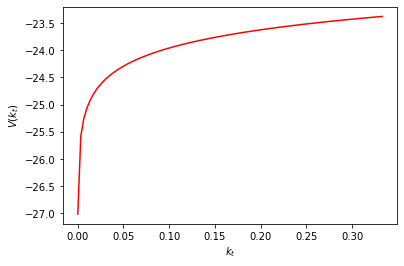

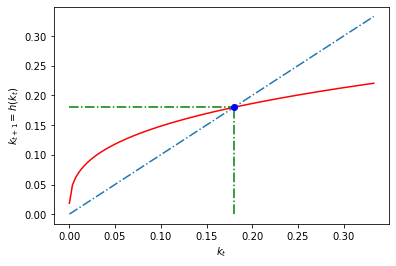

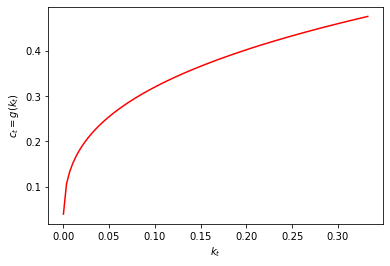

In [12]:
%matplotlib inline

import numpy as np
#from matplotlib import animation
import matplotlib.pyplot as plt
import scipy as sp

# Model parameters
ALPHA = 0.33
BETA = 0.96

# Plotting (and approximation) settings
NGRID = 100

# (Deterministic) Steady state k (used as reference point)
kss = (ALPHA*BETA)**(1.0/(1.0-ALPHA))

# State space bounds
kmin = kss*0.001
kmax = kss*1.85
X = np.linspace(kmin, kmax, NGRID)

# Pencil-and-paper solution (special case)
# Value function
mps = ALPHA*BETA
V_analytic = lambda k: (np.log(1.0-mps) \
                        + np.log(mps)*mps/(1.0-mps))/(1.0-BETA) \
                                        + np.log(k)*ALPHA/(1.0-mps)
# Policy functions (consumption and saving)
g_analytic = lambda k: (1.0 - ALPHA*BETA)*k**ALPHA
h_analytic = lambda k: ALPHA*BETA*k**ALPHA

# Evaluate and plot value and policy functions at grid points X
indirect_utility = V_analytic(X)
consumption = g_analytic(X)
saving = h_analytic(X)

fig0 = plt.figure(facecolor='white') 
plt.plot(X,indirect_utility,'-r') # "True" Value function plot
plt.xlabel('$k_{t}$')
plt.ylabel('$V(k_{t})$')

fig1 = plt.figure(facecolor='white') 
plt.plot(X,saving,'-r', X,X, '-.') # Optimal Saving function, 45-degree line
plt.plot(np.tile(kss,5), np.linspace(kmin, kss, 5), '-.g') # Dash-dot lines (y-axis)
plt.plot(np.linspace(kmin, kss, 5), np.tile(kss,5), '-.g') # Dash-dot lines (x-axis)
plt.plot(kss, kss, 'ob') # Steady state point
plt.xlabel('$k_{t}$')
plt.ylabel('$k_{t+1} = h(k_{t})$')

fig2 = plt.figure(facecolor='white') # Optimal Consumption function
plt.plot(X,consumption,'-r')
plt.xlabel('$k_{t}$')
plt.ylabel('$c_{t} = g(k_{t})$')

plt.show()

# Exercise 3 (Computational beefcaking)

Now implement a Python solution to the problem from **Exercise 1**. Plot the analytical results you derived in **Exercise 2** against your numerical solution here. To do the plotting comparisons use the parameter settings from **Exercise 0**.

## Answer 3

This recomputes the answers from **Exercise 2** using Python, just so you get the hang of doing computational work for more complex problems that may have no analytical solutions.

*Hint*: Re-use your code from **Exercise 0** but now, instead of iterating backwards from a finite terminal period problem, the intuition is iterating from any arbitrary guess of $V$, viz. $V_{n}$, for $n = 0, 1, ...$ until $V = \lim_{n \rightarrow \infty} V_{n}$. That is, what was denoted as a remainder-stage counter $T-t$ in the FHDP problem, is now an index $n$ for successive approximants $V_n$, for a unique $V$ in the IHDP problem!

You'll need to define a stopping rule. In theory, we can define the supremum-norm metric $d(V_n, V_{n+1}) := \sup_{k \in X} | V_{n}(k) - V_{n+1}(k) |$. (Industry insiders ofter just say "sup-norm".) The stopping rule says: Stop iterating over $n$, when $d(V_n, V_{n+1}) \rightarrow 0$. In practice, we define the sup-norm metric by the following function when the functions' data are finitely stored or represented:

In [13]:
# Metric for computational functions
def supnorm(V,W):
    """Metric between two functions represented by
    finite-element NumPy arrays V and W"""
    return (np.absolute(V - W)).max()



*Pseudocode*: 

Define state space $X := [0, \overline{k}]$. Fix model pritimives as functions $f: X \rightarrow \mathbb{R}_{+}$ and $U: [0, f(k)] \rightarrow \mathbb{R}$. Set tolerance for zero as a small number $\epsilon > 0$.

0. Set $n \gets 0$

1. Initialize function guess $W_{n}: X \rightarrow \mathbb{R}$.

2. Evaluate the RHS of Bellman equation. Two options for the user: For every $k \in X$, 
    * Option 1: Evaluate RHS problem of
        $$
        W_{n+1}(k) = \max_{c = g_{n}(k) \in [0, f(k)]} \left\{ U(c) + \beta W_{n}(k_{+1}): k_{+1} = f(k) - c  \right\} \equiv T(W_n)(k).
        $$
      Candidate solution is a pair of value and policy *functions*: $( W_{n+1}, g_{n})$.
    
    * Option 2: Evaluate RHS of
        $$
        W_{n+1}(k) = \max_{k_{+1} = h_{n}(k) \in [0, f(k)]} \left\{ U(f(k)- k_{+1}) + \beta W_{n}(k_{+1}) \right\} \equiv T(W_n)(k).
        $$
      Candidate solution is a pair of value and policy *functions*: $(W_{n+1}, h_{n})$.

3. Calculate distance between successive approximants:
    $$
    d(W_{n+1}, W_{n}) := \max_{k \in X} \bigg{|} W_{n+1}(k) - W_{n}(k) \bigg{|} 
    $$
    
4. If $d(W_{n+1}, W_{n}) \geq \epsilon$, set $n \gets n+1$, and repeat steps 1 to 3. Else, stop.



*Numerical (approximate) solution by value-function iteration*

Now, suppose we didn't know that this example can be solved by hand. So let's implement our algorithm described in the pseudocode before. First, we define the functions defining model primitives:

In [14]:
def U(c):
    """Log utility function"""
    return np.log(c)
    
def f(k, ALPHA):
    """Cobb-Douglas production function"""
    return k**ALPHA

We'll need some settings for the approximation too:

In [15]:
# Approximation settings
TOL = 1e-3     # Tolerance for zero (stopping rule)
MAXITER = 200  # Ad-hoc stopping criterion to prevent infinite loop

In [27]:
def T(X, V_old):
    """The Bellman operator, i.e., the function-valued T-map"""
    # Define linear interpolant function, given X, V_old(X)
    V_interp = lambda x_obs: np.interp(x_obs, X, V_old)    
    # Pre-allocate memory space
    V_new = np.empty(X.size)
    g_new = V_new.copy()
    h_new = V_new.copy()    
    for index_k, k in enumerate(X):
        y = f(k, ALPHA)
        objective_function = lambda c: -( U(c) + BETA * V_interp(y - c) ) # inside the max operator of T(.)
        k_lb = X.min()
        k_ub = y
        c_optimal = opt.fminbound(objective_function, k_lb, k_ub) # max :=: minimization of -ve objective
        kp_optimal = y - c_optimal # given optimizer c_optimal = g(k) at each fixed k, find k_optimal = h(k)
        V_new[index_k] = -objective_function(c_optimal) # Building up new guess of value function
        g_new[index_k] = c_optimal # Building up implied new guess of consumption function
        h_new[index_k] = kp_optimal # Building up implied new guess of saving function
    return V_new, g_new, h_new

*Caveat*: ``fminbnd`` applies to univariate functions only. In all our examples in this course, we'll focus on a single choice variable problem. More generally, in your industrial work, you will have to use the table-lookup method again, or use nonlinear multivariate optimizers.

*Note* the for-loop over finite elements of $X \ni k$, when defining the Bellman operator $T$ above? (Read the pseudocode/recipe earlier carefully if you're not sure why this is the case!) 

So now, let's apply the operator $T$ in our successive approximation scheme:

In [17]:
# Initialize guess of V
W_init = np.zeros(X.size)
W_old = W_init.copy()
gap = 1.0

# Initiate Python lists for intermediate storage (for animation)
V_approx_seq = []  
g_approx_seq = []
h_approx_seq = []

# Iterate on the Bellman functional operator T until converged
for n in range(MAXITER):
    V_approx_seq.append(W_old) # Store intermediate results (for animation)
    W_new, cpolicy, kpolicy = T(X, W_old) # Evaluate T operator once
    g_approx_seq.append(cpolicy) # store current guesses of policy functions ...
    h_approx_seq.append(kpolicy)
    gap = supnorm(W_new, W_old) # Distance between consecutive approximants
    print( "Iteration %i: distance(W_%i, W_%i) = %5.4f" % (n, n, n+1, gap) )
    W_old = W_new
    
    if (gap < TOL): # Stopping rule
        print("\nGood on ya!\n")
        break

Iteration 0: distance(W_0, W_1) = 2.8458
Iteration 1: distance(W_1, W_2) = 1.6281
Iteration 2: distance(W_2, W_3) = 1.1153
Iteration 3: distance(W_3, W_4) = 0.9261
Iteration 4: distance(W_4, W_5) = 0.8422
Iteration 5: distance(W_5, W_6) = 0.7934
Iteration 6: distance(W_6, W_7) = 0.7568
Iteration 7: distance(W_7, W_8) = 0.7251
Iteration 8: distance(W_8, W_9) = 0.6956
Iteration 9: distance(W_9, W_10) = 0.6676
Iteration 10: distance(W_10, W_11) = 0.6408
Iteration 11: distance(W_11, W_12) = 0.6152
Iteration 12: distance(W_12, W_13) = 0.5906
Iteration 13: distance(W_13, W_14) = 0.5670
Iteration 14: distance(W_14, W_15) = 0.5443
Iteration 15: distance(W_15, W_16) = 0.5225
Iteration 16: distance(W_16, W_17) = 0.5016
Iteration 17: distance(W_17, W_18) = 0.4816
Iteration 18: distance(W_18, W_19) = 0.4623
Iteration 19: distance(W_19, W_20) = 0.4438
Iteration 20: distance(W_20, W_21) = 0.4261
Iteration 21: distance(W_21, W_22) = 0.4090
Iteration 22: distance(W_22, W_23) = 0.3926
Iteration 23: dis

Below we plot the snapshot of a few approximants $W_{n}$ for the true function $V$. In practice, for finitely many steps, $W_{n}$ converges (for a given tolerance or stopping criterion). 

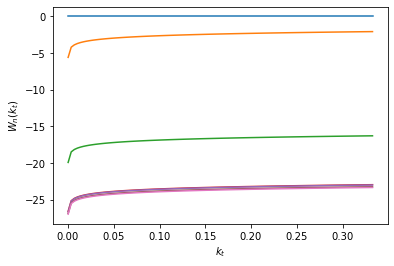

In [18]:
fig3 = plt.figure(facecolor='white')
plt.plot(X,V_approx_seq[0])
plt.plot(X,V_approx_seq[3])
plt.plot(X,V_approx_seq[30])
plt.plot(X,V_approx_seq[100])
plt.plot(X,V_approx_seq[103])
plt.plot(X,V_approx_seq[130])
plt.plot(X,V_approx_seq[-1])
plt.xlabel('$k_{t}$')
plt.ylabel('$W_{n}(k_{t})$')
plt.show()

(In Extra Stuff just below, there is a complete script that generates a MPEG-4 video showing the animation of these sequences of approximant functions.)

And here's the end result by itself. Let's superimpose the previous analytical expression (which we solved for by hand) for the value function $V$ against the approximate value function $\lim_{n \rightarrow \infty}W_{n}$:

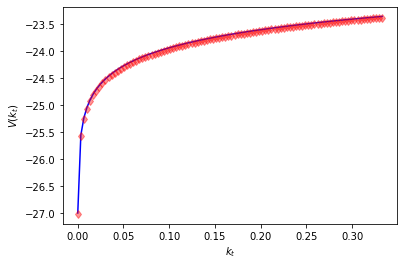

In [19]:
# Plot numerical approximation of the value function
fig4 = plt.figure(facecolor='white')
plt.plot(X,W_new, '-b') # blue line
# ... and superimpose the analytic (exact) value function
plt.plot(X, indirect_utility, 'dr', clip_on=False, alpha=0.421) # red-circle markers
plt.xlabel('$k_{t}$')
plt.ylabel('$V(k_{t})$')
plt.show()

## Extra stuff (Appendix to Answer 3)

Below, we'll work through how you can animate the successive approximations of the value function in the problem above.

You may need to have [previously installed FFMPEG on your machine](https://www.ffmpeg.org/).

**Step 1**: Import tools for video encoding and HTML rendering

In [20]:
from matplotlib import animation, rc
from IPython.display import HTML

**Step 2**: Define the same figure and axes for successive plots

Text(0.5, 0, '$k_{t}$')

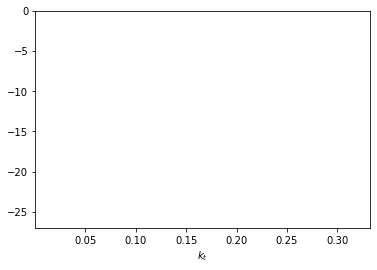

In [21]:
# First set up the figure, the axis, and the elements to be animated
fig4 = plt.figure(facecolor='white')
ax = plt.axes(xlim=(X.min(), X.max()),
                ylim=(indirect_utility.min(), W_init.max()))
#points, = ax.plot([], [])
line, = ax.plot([], [], '-b')
plt.xlabel('$k_{t}$')

**Step 3**: Define functions for successively plotting sequence of approximating functions $\{W_{n}\}$

In [22]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function.  This is called sequentially
def animate_vfunapprox(i):
    x = X
    y = V_approx_seq[i]
    line.set_data(x, y)
    return line,

**Step 4**: Call MATPLOTLIB's animation library to do the video encoding

In [23]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig4, animate_vfunapprox, init_func=init,
                               frames=len(V_approx_seq), interval=200, blit=True)

**Step 5**: Use IPYTHON's display library to render the video on a web browser

In [24]:
# Render object anim to HTML5 compatible video
HTML(anim.to_html5_video())

Remark 1: 
* In theory, we have $\lim_{n \rightarrow \infty} W_{n} = V$ and $\lim_{n \rightarrow \infty} \pi_{n} = \pi$, where $\pi = g$ (or $h$). In words: What this says is that we have a reliable method for solving this infinite-horizon problem via the recursion on the Bellman functional equation. The algorithm implied by the Banach Fixed Point Theorem says that "no matter what function guess" we begin with as a candidate solution, the Bellman operator implies a succession of improved guesses or candidate solution functions. This sequence of functions is uniformly convergent to the true value function $(V)$. (See [Class Notes for detailed proof](https://phantomachine.github.io/econ8022/dynamic-programming.html#existence-of-a-unique-continuous-value-function).) Under convexity assumptions on primitives, we can also guarantee that there is a unique policy function $g$ that supports or induces $V$.

Remark 2:

* This is quite a powerful theorem in practice for many classes of models. But it works only if some sufficient conditions on the model primitives are met: We need to prove that the Bellman functional is a contraction map (with modulus $\beta$) and that the domain of this self map (i.e., the set of bounded and continuous functions) is a *complete metric* space. In other words, it's quite general, but still not general enough. So grad students and policy modellers/analysts, you still need to master your underlying theory and know the beasts you deal with, and not blindly build and solve your models on the computer!

    * There are plenty of relaxations to some stringent assumptions (e.g., boundedness of primitive functions) that have been dealt with in the applied math literature. (See the Hernandez-Lerma and Laserre reference in the Course Outline.)

Remark 3:

* Once we have $g$ or $h$ we have a recursive description of the dynamic equilibrium of the model economy, just like in Solow-Swan! The difference here is that we have to do more heavy lifting to solve for the consumption/saving policy function. In Solow-Swan it was an ad-hoc or hard-wired behavioral *assumption*.

* In the exercises below we repeat the same method for different applications:
    * Special-case linear-constraint and quadratic-objective (LQ) problems
    * Closed-form example with firm investment decision
    * General equilibrium using a notion of recursive competitive equilibrium
    * Recursive competitive equilibrium and optimal taxation (under policy commitment)

**Homework:** Now that we have the optimal policy functions, can you write a few lines of Python code below, using the policy functions (either consumption or saving, or both) to simulate an *equilibrium outcome* or *path* of the economy, beginning from say, $k_{0} = 0.0001$?

Hint: The policy functions are stored as vector arrays with *NGRID* many points. The initial value $k_{0}$ may not even be an element of the finitely stored data points describing the functions. What do we do? Let's use linear interpolation again to obtain values of these policy function at any $k_{t}$ is not defined in the finite set $X$ on the computer. (See above for an example usage earlier, and hack it again for your application here!)

In [25]:
# Simulate time path of economy
Time_Horizon = 15
k_initial = X.min()
k_sim = np.empty(Time_Horizon)
c_sim = np.empty(Time_Horizon-1)
y_sim = np.empty(Time_Horizon-1)
k_sim[0] = k_initial

# Interpolants
g_fit = FunctionFit(X,kpolicy)
h_fit = FunctionFit(X,cpolicy)

for t in range(Time_Horizon-1):
    k_sim[t+1] = g_fit(k_sim[t])
    c_sim[t] = h_fit(k_sim[t])
    y_sim[t] = f(k_sim[t],ALPHA)

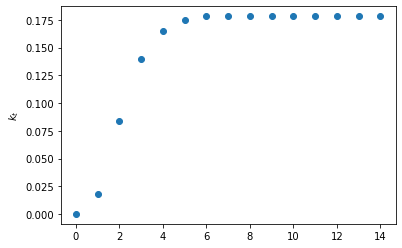

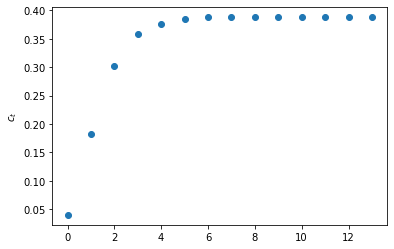

In [26]:
# Show optimal trajectory (finite subsequence)
plt.figure()
plt.plot(k_sim, 'o')
plt.ylabel("$k_{t}$")

plt.figure()
plt.plot(c_sim, 'o')
plt.ylabel("$c_{t}$")

plt.show()

## Exercise 4 (More beefcaking)

Show, by induction, that the solution to **Exercise 0** converges to the same solution in **Exercise 2**, as $T \rightarrow +\infty$.

**Answer**. This was shown in your lecture slide handouts!

## Exercise 5

You can re-purpose the finite-horizon code from above. Show how you can use that to compute the same model except that now $T \rightarrow \infty$.

## Optional exercise for the serious student

Under some conditions, the Bellman operator also implies a dual recursive operator in the form of an Euler equation and resource constraint system. Our template optimal growth model above is a prime example.

1. Show how you can derive the Euler functional equation together with the dynamic resource constraint. Hint: Combine the first-order condition on the RHS of the Bellman equation and exploit a version of the envelope theorem (due to Benveniste and Scheinkman).

2. What is the economic interpretation of this alternative Euler-equation description of the decision maker's optimal plan?

3. Devise a code recipe or pseudocode for computing the fixed point of this system of first order conditions: i.e., the Euler equation and the recursive resource constraint. Hint: The fixed point you seek is now in terms of the decision function directly.

4. Implement your code and solve for the fixed point (optimal decision function) directly.

## Answer 5.1

We can also solve the same problem above by attacking the Euler equation directly.

Since the problem is time invariant, we'll now use the notation $X_{t} := X$ and $X_{t+1} = X_{+1}$.

The first-order condition on the RHS of the Bellman equation above is:
$$
-u'(c) + \beta V'(k_{+1}) = 0.
$$
The envelop condition is
$$
V'(k) = u'(c)f'(k)
$$
where $c = g(k)$ and $g$ is the (to-be-computed) optimal consumption function.

Leading the envelop condition one period ahead and plugging that into the first order condition we get:
$$
u'(c) = \beta u'(c_{+1}) f'(k_{+1});
$$
and not forgetting that what is optimal must also be feasible:
$$
k_{+1} = f(k) - c,
$$
where $c = g(k) \in [0, f(k)]$.

**Solving difference equation for a $k_{0}$-dependent optimal sequence $\{k_{t+1}(k_{0})\}_{t \in \mathbb{N}}$**. The last two necessary conditions imply a second-order, nonlinear difference equation in $k_{t}$. To pin down an optimal path, we need two "boundary" values: $k_{0}$ and a transversality condition $\lim_{T \rightarrow} \beta^{T+1} u'(c_{T+1})k_{T+1} = 0$.

**Solving as a functional problem.** Or more generally, we can solve the system above as a functional fixed-point problem.

Observe that the optimality conditions can be more verbosely written as
$$
g(k) = (u')^{-1}\left( 
                \beta u'\left[g\left(f(k)-g(k))\right)\right] 
                \cdot
                f'\left[f(k)-g(k)\right] 
                \right)
     := \mathcal{E}(g)(k).
$$

The RHS expression is a functional operator $\mathcal{E}$ and $g$ is its fixed point.

This suggests that we might try a successive approximation scheme again. 

Here's a pseudocode:

**Pseudocode**.

Set $n \gets 0$ and $\epsilon > 0$.

1. Guess a policy function $k \mapsto g_{n}(k)$.

2. Evaluate operator $\mathcal{E}$ at $g_{n}$. For every $k \in X$:
    $$
    g_{n+1}(k) \gets \mathcal{E}(g_{n})(k).
    $$
    
3. Calculate distance:
    $$d_{n} \gets \| g_{n+1} - g_{n} \|$$
    
4. Set:
    $$g_{n} \gets g_{n+1}$$
    $$n \gets n+1$$
    
5. Repeat Steps 2 to 4 until $d_{n} < \epsilon$.

Now try coding this up and show us!